In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import funciones as fn

### Consigna 1-

Reescribiendo la ecuación **4** como una sumatoria, tenemos lo siguiente:  
$$(I-A)^{-1} = \lim_{n \to \infty} \sum_{i=1}^{n} A^i$$  

Llamemos $S_h$ a la sumatoria parcial de $h$ términos de la ecuación anterior, tal que:  
$$S_h = \sum_{i=1}^{h} A^i = A^0 + A^1 + \dots + A^h$$  
Si tomamos el limite de $h$ tendiendo a infinito, basicamente tendriamos la ecuacion original:  
$$\lim_{h \to \infty} S_h = (I-A)^{-1}$$  
Multiplicando por $(I-A)$ a izquierda, y aplicando propiedades del limite:  
\begin{align*}
(I-A) \lim_{h \to \infty} S_h &= (I-A) \cdot (I-A)^{-1} \\
\lim_{h \to \infty} ((I-A)\cdot S_h) &= I \\
\lim_{h \to \infty} (S_h - A\cdot S_h) &= I
\end{align*}  
Observar lo siguiente:  
\begin{align*}
A\cdot S_h &= A(A^0 + A^1 + \dots + A^h) \\
A\cdot S_h &= A\cdot A^0 + A\cdot A^1 + \dots + A\cdot A^h \\
A\cdot S_h &= \sum_{i=1}^{h+1} A^i \\
\end{align*}  
Retomando el limite, si expandimos ambas sumatorias tendriamos lo siguiente:  
\begin{align*}
\lim_{h \to \infty}((I + A + A^2 + \dots + A^h) - (A + A^2 + \dots + A^h + A^{h+1})) = I \\
\lim_{h \to \infty} (I + (A - A) + (A^2 - A^2) + \dots + (A^h - A^h) - A^{h+1}) = I \\
\end{align*}  
Como se puede ver, se cancelan todos los terminos menos $I$ y $A^{h+1}$, es decir que llegamos a lo siguiente:  
\begin{align*}
\lim_{h \to \infty}(I - A^{h+1}) = I \\
I - \lim_{h \to \infty} A^{h+1} = I \\
\lim_{h \to \infty} A^{h+1} = 0 \\
\end{align*}  
De esta manera (y cambiando $h$ por $n$) llegamos a lo que se queria probar. $\quad \blacksquare$


---

### Consigna 2 -

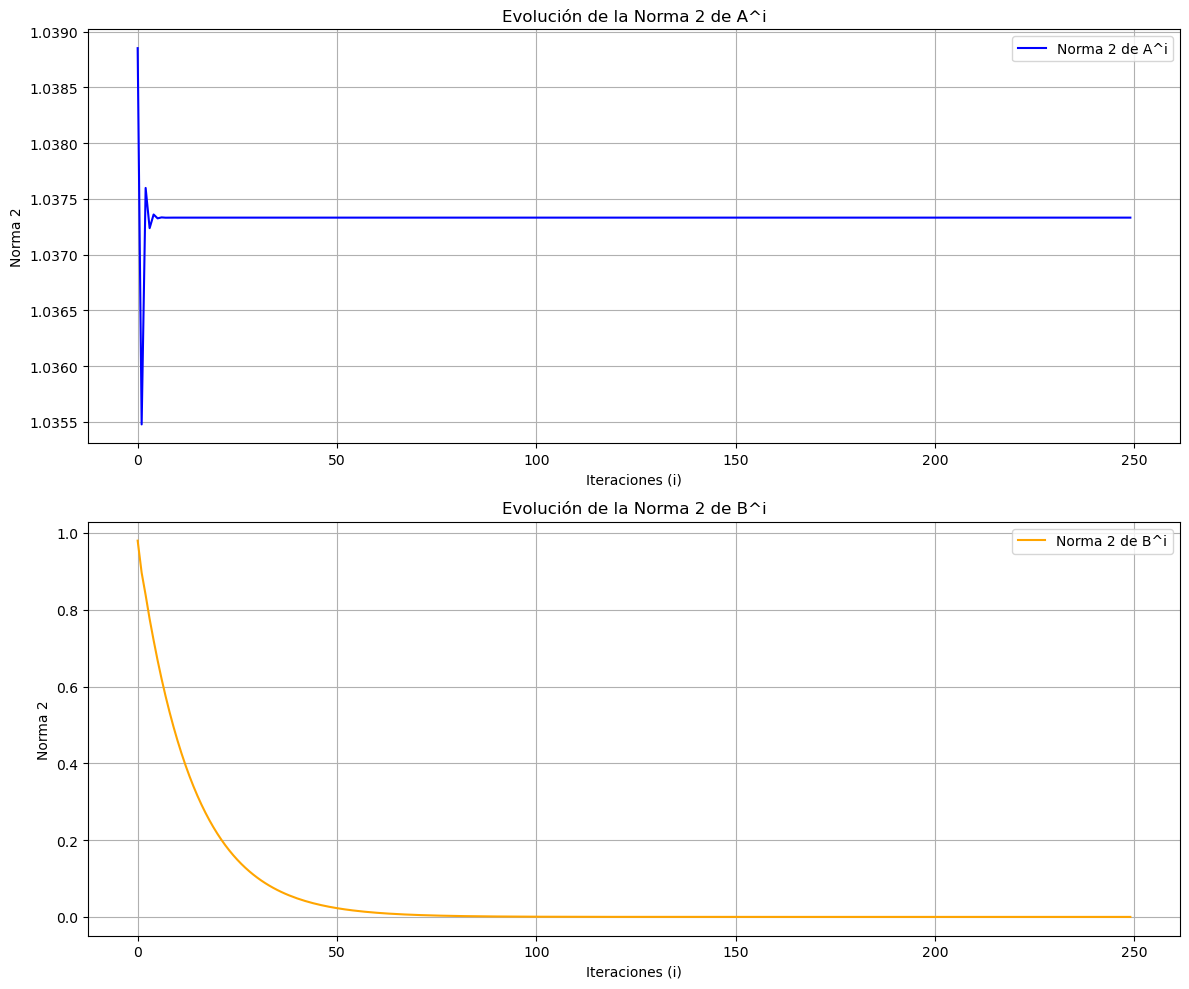

[ 1.        +0.j         -0.27661726+0.j         -0.08954301+0.j
  0.16658013+0.04596704j  0.16658013-0.04596704j]


In [6]:
# Declaramos las matrices
A = np.array([[0.186, 0.521, 0.014, 0.32, 0.134] ,
              [0.24, 0.073, 0.219, 0.013, 0.327] ,
              [0.098, 0.12, 0.311, 0.302, 0.208] ,
              [0.173, 0.03, 0.133, 0.14, 0.074] ,
              [0.303, 0.256, 0.323, 0.225, 0.257]])
B = np.array([[0.186, 0.521, 0.014, 0.32, 0.134] ,
              [0.24, 0.073, 0.219, 0.013, 0.327] ,
              [0.098, 0.12, 0.311, 0.302, 0.208] ,
              [0.173, 0.03, 0.133, 0.14, 0.074] ,
              [0.003, 0.256, 0.323, 0.225, 0.257]])
V1= []
V2=[]
Aaux = A
Baux = B
# Para un rango de 250, multiplicamos cada matriz por si misma y calculamos y guardamos la norma a cada paso
for i in range(250):
    x = sp.linalg.norm(Aaux, 2)
    Aaux = Aaux @ A
    V1.append(x)

    y = sp.linalg.norm(Baux, 2)
    Baux = Baux @ B
    V2.append(y)
# Graficamos
plt.figure(figsize=(12,10))

plt.subplot(2, 1, 1)
plt.plot(V1, label="Norma 2 de A^i", color="blue")
plt.xlabel("Iteraciones (i)")
plt.ylabel("Norma 2")
plt.title("Evolución de la Norma 2 de A^i")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(V2, label="Norma 2 de B^i", color="orange")
plt.xlabel("Iteraciones (i)")
plt.ylabel("Norma 2")
plt.title("Evolución de la Norma 2 de B^i")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(sp.linalg.eigvals(A))

---

### Consigna 3 -

En este ejercicio, realizaremos un método Monte-Carlo con 250 iteraciones, en cada iteracion en rango 250, calcularemos el autovalor más grande con el método de la potencia, para luego devolver el promedio de los 250 autovalores que nos devolvió

In [8]:
vects= np.random.uniform(-10,10,(250, 5))
autovaloresA = [] ## lista de autovalores de A
autovaloresB = [] ## lista de autovalores para B
for i in range(250):
    r1,_= fn.metodoPotencia(A,vects[i],1000)
    autovaloresA.append(r1) ## agregamos al array el autovalor obtenido
    r2,_ =fn.metodoPotencia(B,vects[i],1000)
    autovaloresB.append(r2) ## lo mismo para B
promedioA = np.mean(autovaloresA) ## calculamos la media y la desviación estándar
promedioB = np.mean(autovaloresB)
desviacionEstandarA = np.std(autovaloresA)
desviacionEstandarB = np.std(autovaloresB)
print(f"{'Matriz':<10} {'Promedio':<15} {'Desviación Estándar':<20}")
print(f"{'A':<10} {promedioA:<15.4f} {desviacionEstandarA:<20.4f}")
print(f"{'B':<10} {promedioB:<15.4f} {desviacionEstandarB:<20.4f}")


Matriz     Promedio        Desviación Estándar 
A          1.0000          0.0000              
B          0.9277          0.0000              


---

### Consigna 4.a)

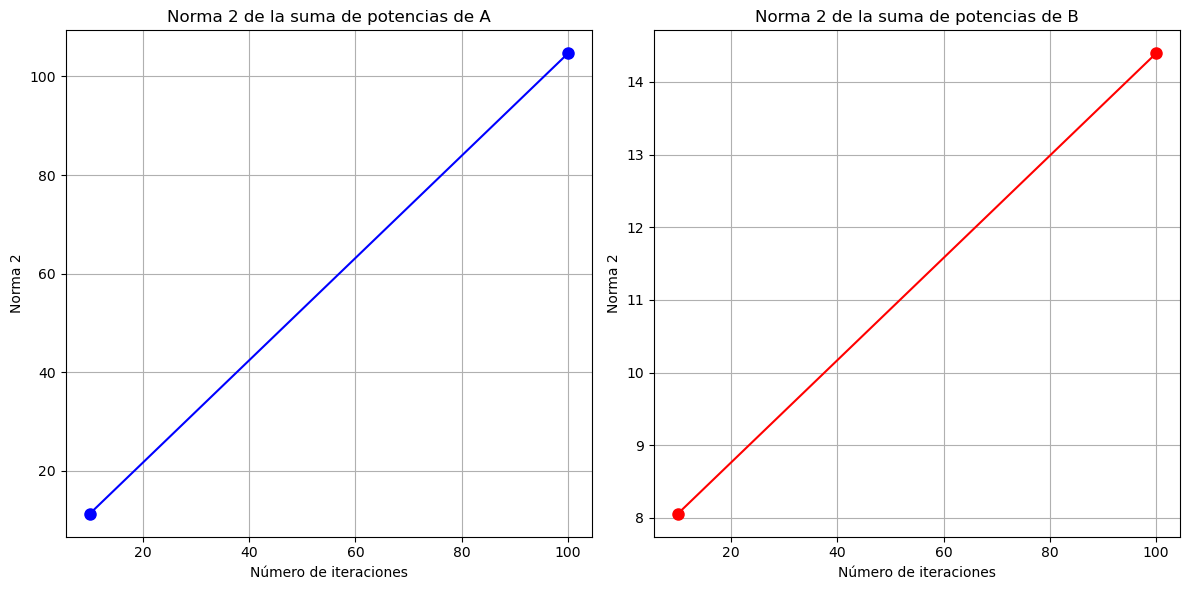

In [10]:
A_acumulada = np.eye(A.shape[0])
B_acumulada = np.eye(B.shape[0])
## calculamos la serie de potencias de A y B. Cuando i es 10 o 100 calculamos y guardamos la norma para luego graficarlas
for i in range(1, 101):
    A_acumulada += np.linalg.matrix_power(A, i)
    B_acumulada += np.linalg.matrix_power(B, i)

    if i == 10:
        norma_A_10 = sp.linalg.norm(A_acumulada, 2)
        norma_B_10 = sp.linalg.norm(B_acumulada, 2)

    if i == 100:
        norma_A_100 = sp.linalg.norm(A_acumulada, 2)
        norma_B_100 = sp.linalg.norm(B_acumulada, 2)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot([10, 100], [norma_A_10, norma_A_100], 'bo-', markersize=8)
axs[0].set_title("Norma 2 de la suma de potencias de A")
axs[0].set_xlabel("Número de iteraciones")
axs[0].set_ylabel("Norma 2")
axs[0].grid(True)

axs[1].plot([10, 100], [norma_B_10, norma_B_100], 'ro-', markersize=8)
axs[1].set_title("Norma 2 de la suma de potencias de B")
axs[1].set_xlabel("Número de iteraciones")
axs[1].set_ylabel("Norma 2")
axs[1].grid(True)

plt.tight_layout()
plt.show()




### Consigna 4.b)

Podemos ver en el gráfico que la norma de A toma un valor muy grande para las 100 iteraciones, mientras que la de B parece crecer muy lentamente, o converger a un número. Si hicieramos más iteraciones, la norma de A continuaría creciendo mientras que la de B seguiría estabilizandose. Esto para estar relacionado con el radio espectral de una matriz, como veremos en el siguiente inciso.

### Consigna 4.c)

La convergencia de la serie de potencias $[(I - A)^{-1} = I + A + A^2 + \dots + A^n + \ldots]$ depende de que el radio espectral de la matriz $A$ (el valor absoluto de su mayor autovalor) sea menor que 1. Si el radio espectral es menor que 1, entonces cada potencia de $A$ tiende a cero a medida que el exponente crece, asegurando que la serie infinita converge. Aplicando este criterio a las matrices $A$ y $B$, calculamos el mayor autovalor en magnitud para cada una: si ambos radios espectrales resultan menores que 1, podemos concluir que la serie de potencias convergerá para ambas matrices.

In [20]:
autovalores_A = sp.linalg.eigvals(A)
autovalores_B = sp.linalg.eigvals(B)

radio_espectral_A = max(abs(autovalores_A))
radio_espectral_B = max(abs(autovalores_B))
convergencia_A = radio_espectral_A < 1  
convergencia_B = radio_espectral_B < 1
print(convergencia_A)
print(convergencia_B)


False
True


El radio espectral de $A$ es mayor a 1, por lo tanto no converge. Paralelamente, el radio espectral de $B$ es menor a 1, por lo tanto converge.

### Consigna 4.d

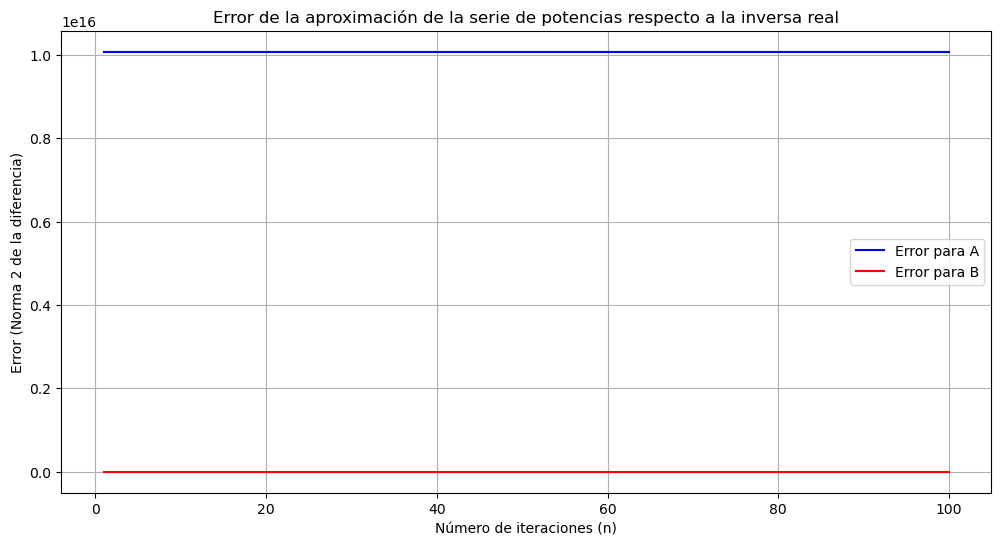

In [22]:
I = np.eye(A.shape[0])
I_menos_A = I - A
I_menos_B = I - B


AL, AU, AP = fn.calcularLU(I_menos_A)
BL, BU, BP = fn.calcularLU(I_menos_B)
inversa_I_menos_A = fn.inversaLU(AL, AU, AP)
inversa_I_menos_B = fn.inversaLU(BL, BU, BP)


A_acumulada = np.eye(A.shape[0])
B_acumulada = np.eye(B.shape[0])
errores_A = []
errores_B = []


for n in range(1, 101):
    A_acumulada += np.linalg.matrix_power(A, n)
    B_acumulada += np.linalg.matrix_power(B, n)

    # Calculamos el error como la norma de la diferencia entre la serie acumulada y la inversa real
    error_A = sp.linalg.norm(A_acumulada - inversa_I_menos_A, ord=2)
    error_B = sp.linalg.norm(B_acumulada - inversa_I_menos_B, ord=2)

    errores_A.append(error_A)
    errores_B.append(error_B)

# Graficamos los errores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 101), errores_A, label="Error para A", color="blue")
plt.plot(range(1, 101), errores_B, label="Error para B", color="red")
plt.xlabel("Número de iteraciones (n)")
plt.ylabel("Error (Norma 2 de la diferencia)")
plt.title("Error de la aproximación de la serie de potencias respecto a la inversa real")
plt.legend()
plt.grid(True)
plt.show()

---

### Consigna 5

In [24]:
import pandas as pd


# Cargamos el excel
archivo = "./matrizlatina2011_compressed_0.xlsx"
df = pd.read_excel(archivo, sheet_name='LAC_IOT_2011')
df.set_index('Country_iso3', inplace=True)

# Matrices de insumo-producto intrarregionales para PRY y SLV
matriz_intrarregional_PRY = df.loc['PRY', 'PRYs1': 'PRYs40']
matriz_intrarregional_SLV = df.loc['SLV', 'SLVs1': 'SLVs40']

# Outputs de PRY y SLV
outputPRY = df.loc['PRY', 'Output']
outputSLV = df.loc['SLV', 'Output']
outputPRY = outputPRY.to_numpy()
outputSLV = outputSLV.to_numpy()
outputSLV[outputSLV == 0] = 1  # Notamos que había ceros en el output de SLV, y hacemos esto para evitarlo

# Crear matrices diagonales a partir del output y calcular sus inversas usando LU
P_PRY = np.diag(outputPRY.flatten())
P_SLV = np.diag(outputSLV.flatten())

P_PRYL, P_PRYU, P_PRYP = fn.calcularLU(P_PRY)
P_inv_PRY = fn.inversaLU(P_PRYL, P_PRYU, P_PRYP)
S_SLVL, S_SLVU, S_SLVP = fn.calcularLU(P_SLV)
P_inv_SLV = fn.inversaLU(S_SLVL, S_SLVU, S_SLVP)

# Matrices de coeficientes técnicos
A_rr = matriz_intrarregional_PRY @ P_inv_PRY
A_ss = matriz_intrarregional_SLV @ P_inv_SLV

A_rr = A_rr.to_numpy()
A_ss = A_ss.to_numpy()

# Función para aplicar Monte Carlo, calcular el promedio y la desviación estándar del autovalor dominante
def calcularAutovalorMonteCarlo(A, num_experimentos=250):
    autovalores = []
    n = A.shape[0]

    for _ in range(num_experimentos):
        v = np.random.rand(n)
        v /= np.linalg.norm(v)
        autovalor, _ = fn.metodoPotencia(A, v)
        autovalores.append(autovalor)

    promedio = np.mean(autovalores)
    desviacion_estandar = np.std(autovalores)
    return promedio, desviacion_estandar

# Calculamos el autovalor dominante para A_rr y A_ss
autovalor_dominante_Arr, desviacion_Arr = calcularAutovalorMonteCarlo(A_rr)
autovalor_dominante_Ass, desviacion_Ass = calcularAutovalorMonteCarlo(A_ss)

print("Autovalor dominante de A_rr (Paraguay):", autovalor_dominante_Arr)
print("Desviación estándar de A_rr:", desviacion_Arr)
print("Autovalor dominante de A_ss (El Salvador):", autovalor_dominante_Ass)
print("Desviación estándar de A_ss:", desviacion_Ass)

# Evaluamos la convergencia de la serie de potencias
convergencia_Arr = autovalor_dominante_Arr < 1
convergencia_Ass = autovalor_dominante_Ass < 1

print("¿Converge la serie para A_rr (Paraguay)?", convergencia_Arr)
print("¿Converge la serie para A_ss (El Salvador)?", convergencia_Ass)



Autovalor dominante de A_rr (Paraguay): 119.82500000000003
Desviación estándar de A_rr: 2.842170943040401e-14
Autovalor dominante de A_ss (El Salvador): 0.2632724862760833
Desviación estándar de A_ss: 0.0
¿Converge la serie para A_rr (Paraguay)? False
¿Converge la serie para A_ss (El Salvador)? True


---

### CONSIGNA 6

##### Item a

Para probar lo que se pide vamos a partir de la siguiente ecuacion:  
\begin{align*}
E_nz \; &= \; (Id - \frac{1}{n}ee^t) z \\
E_nz \; &= \; z - \frac{1}{n}ee^tz \\
\end{align*}  
Observar que $e^tz$ es la sumatoria de las componentes del vector $z$. Luego la ecuacion quedaria de la siguiente manera:  
$$E_nz = z - \frac{1}{n}e \sum_{i=1}^{n} z_i$$
Ahora, queremos calcular el promedio de eso, y ver que es igual a 0. Como sabemos, el promedio sera la suma de todos los componentes del vector resultante de hacer esa operacion, dividido por $n$, es decir:  
\begin{align*}
Prom(E_nz) &= \frac{1}{n} \sum_{h=1}^{n} (z - \frac{1}{n}e \sum_{i=1}^{n} z_i) \\
Prom(E_nz) &= \frac{1}{n} \sum_{h=1}^{n}z_h - \frac{1}{n^2}e \sum_{h=1}^{n} \sum_{i=1}^{n} z_i \\
\end{align*}  
Aca haremos dos observaciones antes de continuar.  
1.  $(e\sum_{h=1}^{n} \sum_{i=1}^{n} z_i)$ es un vector columna cuyos elementos son todos $(\sum_{h=1}^{n} \sum_{i=1}^{n} z_i)$, luego, simplemente nos desharemos del vector $e$ ya que es redundante seguirlo contemplando, ademas de que mejora la legibilidad de los siguientes pasos.
2.  Como $z_i$ no depende del $h$ de la primer sumatoria, lo que en realidad estariamos haciendo es sumar $n$ veces la segunda sumatoria.

Luego, usando las observacion tendriamos lo siguiente:  
\begin{align*}
Prom(E_nz) &= \frac{1}{n} \sum_{h=1}^{n} z_h - \frac{1}{n^2} n\sum_{i=1}^{n} z_i \\
Prom(E_nz) &= \frac{1}{n} \sum_{h=1}^{n} z_h - \frac{1}{n} \sum_{i=1}^{n} z_i \\
\end{align*}  
Pero observar que aunque las sumatorias tengas diferentes indices, ambas suman exactamente lo mismo, osea que su diferencia es igual a 0. Por ende:  
$$Prom(E_nz) = 0$$  
Que es lo que queriamos probar. $\quad \blacksquare$

Por otro lado, si en vez de tener un vector $z$ tuvieramos una matriz $A$, la ecuacion inicial se transformaria en la siguiente:  
$$E_nA \; = \; A - \frac{1}{n}ee^tA$$  
Lo que estamos haciendo basicamente es restandole a la matriz A el promedio de las columnas de si misma, ya que $e^tA$ es un vector fila con la suma de las columnas de $A$ y luego al multiplicarlo por $\frac{1}{n}e$ estariamos obteniendo una matriz cuyas filas son el vector $\frac{1}{n}e^tA$. Luego, por lo visto en el item anterior, si analizamos $E_nz$ pero tomando como $z$ cada columna individual de $A$, es decir:  
$$(E_nA)_{[i]} = E_nz_{[i]} \quad \text{$\forall i$ columna de cada respectiva matriz} $$  
Podemos decir que como el promedio de las columnas de $A$ tiene que ser 0, entonces esto quiere decir que la suma de los elementos de cada respectiva columna tambien da 0.  

#### **Item b**  
Para calcular los autovalores y autovectores de $E_n$, vamos a utilizar la base dada como sugerencia para ver como actua esta matriz sobre una base de se espacio.  
Comenzemos con el vector $e$.  
\begin{align*}
E_ne &= (I - \frac{1}{n}ee^t)e \\
E_ne &= e - \frac{1}{n}ee^te \\
\end{align*}  
Observar que $e^te$ es sumar 1 $n$ veces, luego $e^te = n$, entonces:  
\begin{align*}
E_ne &= e - \frac{1}{n}en \\
E_ne &= e - e \\
E_ne &= 0 \\
\end{align*}  
Tomando en consideracion la ecuacion de autovalor-autovector de una matriz,  
\begin{align*}
E_nv &= \lambda v \quad con \;v \in \mathbb{R}^n \\
E_ne &= \lambda e \\
0 &= \lambda e \\
\end{align*}  
Es decir que, como $e$ no es el vector nulo, $\lambda = 0$ es un autovalor, cuyo autovector es $e$ (el de la consigna).  
Ahora, hagamos lo mismo con el resto de la base, que son todos vector ortogonales a este vector $e$. Llamemos $d_i$ a algun vector cualquiera de los mencionados.  
\begin{align*}
E_nd_i &= (I - \frac{1}{n}ee^t)d_i \\
E_nd_i &= d_i - \frac{1}{n}ee^td_i \\
\end{align*}  
Notar que como $d_i$ es un vector ortogonal a $e$, entonces $\langle d_i, e \rangle = e^td_i = 0$. Entonces:  
\begin{align*}
E_nd_i &= d_i - \frac{1}{n}e0 \\
E_nd_i &= d_i - 0 \\
E_nd_i &= d_i
\end{align*}  
Es decir que, siguiendo nuevamente la ecuacion de autovalores,  
$$E_nd_i = 1d_i$$  
En otras palabras, $\lambda = 1$ es autovalor, con autovector $d_i$.  
Pero como $d_i$ es un vector arbitrario de la base sugerida, podemos afirmar que cualquier vector ortogonal a $e$, tendra autovalor $\lambda = 1$.  
Observar que, como partimos de una base del subespacio, $\lambda = 0$ tiene dimension 1, mientras que $\lambda = 1$ tiene dimension $n-1$. Esto sera util para calcular el nucleo e imagen de $E_n$.  
Para el **nucleo** queremos hallar los $v \in \mathbb{R}^n$ tales que $E_nv = 0$; y como vimos anteriormente, el $v$ que satisface esa ecuacion es el vector $e$. Luego $Nu(E_n) = e$, y su dimension es 1.  
Para la **imagen** queremos conseguir una base de todos los vectores que se pueden obtener al realizar $E_nv$ con $v \in \mathbb{R}^n$. Como $E_n$ proyecta los vectores sobre el subespacio ortogonal a $e$ (se explica con mas detalle en el item c), se puede decir que ese espacio es su imagen. Luego $Im(E_n) = \langle d_1, d_2, \dots , d_n \rangle$ con $d_i$ vector ortogonal a $e$, y su dimension es $n-1$.


##### Item c  
Para probar que $E_n$ es una proyeccion, basta con ver si $E_{n}^2 = E_n$
\begin{align*}
E_{n}^2 &= (Id - \frac{1}{n}ee^t)(Id - \frac{1}{n}ee^t) \\
E_{n}^2 &= Id - 2\frac{1}{n}ee^t + \frac{1}{n^2}ee^tee^t
\end{align*}  
Recordar que $e^te = n$.
\begin{align*}
E_{n}^2 &= Id - 2\frac{1}{n}ee^t + \frac{n}{n^2}ee^t \\
E_{n}^2 &= Id - 2\frac{1}{n}ee^t + \frac{1}{n}ee^t \\
E_{n}^2 &= Id - \frac{1}{n}ee^t = E_n
\end{align*}  

Luego, $E_n$ es una proyeccion. Mas aun, como $Nu(E_n) \perp Im(E_n)$, $E_n$ es una **Proyeccion ortogonal**. Pero, ¿Sobre que subespacio proyecta?  
Como calculamos en el item b), para cualquier vector $d_i$ ortogonal a $e$, nuestra matriz lo manda a si mismo, en otras palabras, funciona como una "identidad" de ese subespacio. Por ende, se puede afirmar que la matriz $E_n$ es una proyeccion ortogonal sobre el subespacio ortogonal al espacio generado por el vector $e$.  

##### Item d  
A) Si $E_n$ es una matriz ortogonal, entonces $E_n^tE_n = Id$. Veamos si esto se cumple.  
\begin{align*}
E_n^tE_n &= (Id - \frac{1}{n}ee^t)^t(Id - \frac{1}{n}ee^t) \\
E_n^tE_n &= (Id^t - \frac{1}{n}(ee^t)^t)(Id - \frac{1}{n}ee^t) \\
\end{align*}  
Observar que como $ee^t$ es la matriz con todos 1´s, $(ee^t)^t = ee^t$. Luego,  
\begin{align*}
E_n^tE_n &= (Id^t - \frac{1}{n}ee^t)(Id - \frac{1}{n}ee^t) \\
\end{align*}  
Pero como calculamos anteriormente, la parte derecha de la ecuacion es $E_n^2 = E_n$, por lo tanto, $E_n^tE_n \neq Id$. Luego, **NO** es una matriz ortogonal. El item es **FALSO**.  
B) Si $E_n$ es singular (osea no inversible) entonces $det(E_n) = 0$. Para ver si se cumple utilizaremos los autovalores de la matriz usando el polinomio caracteristico.
\begin{align*}
P(x) &= det(E_n - x I) \\
P(x) &= (\lambda_1 - x)(\lambda_2 - x) \dots (\lambda_n - x) \\
\end{align*}  
Donde $\lambda_i$ son los autovalores de $E_n$. Si tomamos $x = 0$, tendriamos el producto de los autovalores de $E_n$.  
\begin{align*}
P(0) &= det(E_n - 0 I) \\
P(0) &= det(E_n) = \lambda_1 \lambda_2 \dots \lambda_n
\end{align*}
Pero recordemos que algun $\lambda_i = 0$ (item 2), por ende  
$$det(E_n) = 0$$.  
Luego $E_n$ es singular. El item es **VERDADERO**  
C) Si $E_n$ es definida positiva, entonce se cumple lo siguiente:  
\begin{cases}
x^tE_nx > 0 & \forall \; x \in \mathbb{R}^n  \\
x^tE_nx = 0 & \text{si } x = 0
\end{cases}  
Nosotros haremos enfasis en la segunda ecuacion.  
Partamos de que $E_ne = 0$ (autovalor $\lambda = 0$, autovector $e$ con todos 1´s). Luego multiplicaremos por izquierda por $e^t$, obteniendo asi la siguiente ecuacion:  
$$x^tE_nx = 0$$  
Notar que llegamos a la segunda ecuacion de las condiciones que cumple una matriz definida positiva. Pero el $x$, en este caso el vector $e$, no cumple que $x \neq 0$. Luego no se estarian cumpliendo las condiciones propuestas, es decis, $E_n$ **no** es definida positiva. El item es **FALSO**.  
D) Para verificar si $tr(E_n) = n-1$ vamos a utilizar algunas propiedades de la traza de una matriz. Ademas, sabemos que  $E_n$ es diagonalizable ya que los autovectores de la misma generan el espacio.
\begin{align*}
E_n &= PDP^{-1} \\
tr(E_n) &= tr(PDP^{-1})  
\end{align*}  
Recordar que $tr(AB) = tr(BA)$. Entonces:  
\begin{align*}
tr(E_n) &= tr(DPP^{-1}) \\
tr(E_n) &= tr(DI) \\
tr(E_n) &= tr(D)
\end{align*}  
Donde $D$ es la matriz diagonal con los autovalores de $E_n$. Recordar que los mismos son todos $1$ excepto uno solo que es igual a 0. Entonces:  
\begin{align*}
tr(E_n) &= \sum_{i=1}^{n} D_{ii} \\
tr(E_n) &= 1 + 1 + \dots + 1 + 0 = 1(n-1) + 0 \\
tr(E_n) &= n-1
\end{align*}  
Llegamos a lo que proponia el ejercicio. El item es **VERDADERO**


---

### Consigna 7

En este ejercicio, definimos la funcion deflacionHotelling en el archivo funciones.py, luego, nos armamos la matriz $\overline{A^{rr}}$ y la matriz $C$ de covarianzas. Por último, llamamos a la función con la matriz de covarianzas y nos devuelve los dos primeros autovalores.

In [26]:
e = np.ones((40, 1))

# Matriz identidad de tamaño n x n
I_40 = np.eye(40)

# Cálculo de E_n
E_40 = I_40 - (1 / 40) * (e @ e.T)

A_ss_barra = E_40 @ A_ss

C = (A_ss_barra.T @ A_ss_barra) / 39

# Funcion deflacionHotelling en funciones.py

_, a,_, b = fn.deflacionHotelling(C, epsilon = 1e-6, cant_iteraciones = 1000)
print(a)
print(b)

[0.06722121 0.06227492 0.         0.2153441  0.18082648 0.15115465
 0.21482209 0.24680792 0.21488427 0.         0.12054683 0.11552942
 0.27152235 0.09579353 0.19411529 0.38637085 0.23177367 0.18239658
 0.30660154 0.16203429 0.12301194 0.09098345 0.08215403 0.0778178
 0.09097822 0.         0.09760034 0.         0.06274736 0.0477657
 0.09261681 0.09741497 0.09185075 0.08348179 0.02954266 0.23547673
 0.18023113 0.12183611 0.06873085 0.17138669]
[-0.13113996  0.02720682  0.          0.08299826 -0.52906189 -0.33290768
 -0.5358801  -0.21869637  0.05552857  0.         -0.0301376   0.04345383
  0.07064995 -0.27313908  0.13866178  0.13955774  0.10954867  0.08281436
  0.11320422  0.11919837  0.02125894  0.08179365  0.07413384  0.04693164
  0.04624294  0.          0.05767989  0.          0.03781661  0.02871892
  0.05585349  0.05867192  0.01406939  0.08862584  0.02247433  0.08142201
  0.16152881  0.05947275  0.03698254  0.06383782]


---

### Consigna 8

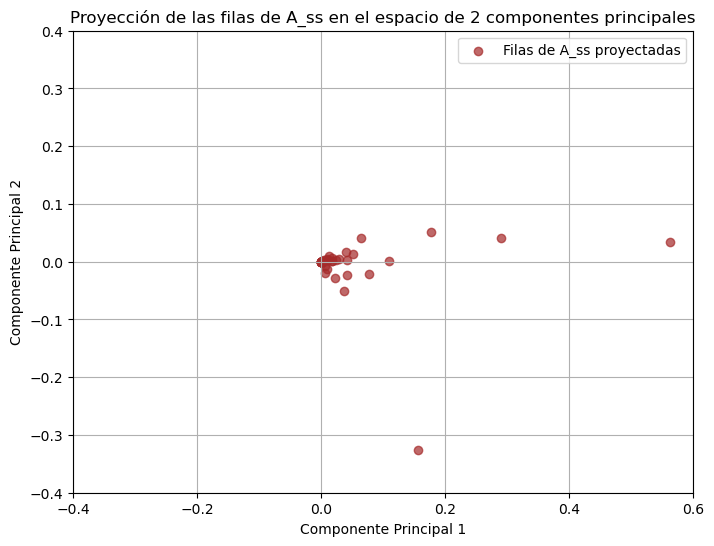

In [28]:
proyeccionX = A_ss @ a
proyeccionY = A_ss @ b

plt.figure(figsize=(8, 6))
plt.scatter(proyeccionX, proyeccionY, color='brown', alpha=0.7, label="Filas de A_ss proyectadas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Proyección de las filas de A_ss en el espacio de 2 componentes principales")
plt.legend()
plt.xlim(-0.4, 0.6)
plt.ylim(-0.4, 0.4)
plt.grid(True)
plt.show()


 Nota: usamos el segundo país asignado (El Salvador), debido a que al usar el primer país, no podíamos identificar los clusters.

En este scatter, podemos identificar tres grupos claros


*   Aquellos cercanos al (0,0)
*   Aquellos con x cerca del 0.2 y coordenada y cerca de 0.3
*   Aquellos con x entre 0.15 y 0.6 y coordenada y debajo de 0






---



### Consigna 9

Tenemos que $H = A(I-A)^{-1}$, pero por la ecuacion **4** sabemos que  
$$(I-A)^{-1} = I+A+A^2+ \dots + A^n + \dots \iff \lim_{n \to \infty} A^{n+1} = 0$$  
Luego,  
\begin{align*}
H &= A(I+A+A^2+ \dots + A^n + \dots) \iff \lim_{n \to \infty} A^{n+1} = 0 \\
H &= A + A^2 + A^3 + \dots + A^{n+1} + \dots \iff \lim_{n \to \infty} A^{n+1} = 0
\end{align*}  
En otras palabras, $H$ es la suma de potencias de $A$. Para que $H$ exista, entonces es necesario que, al igual que para $(I-A)^{-1}$,  
$$\lim_{n \to \infty} A^{n+1} = 0$$  
Es decir, que la suma de potencias converga a 0.




---




#### Consigna 10

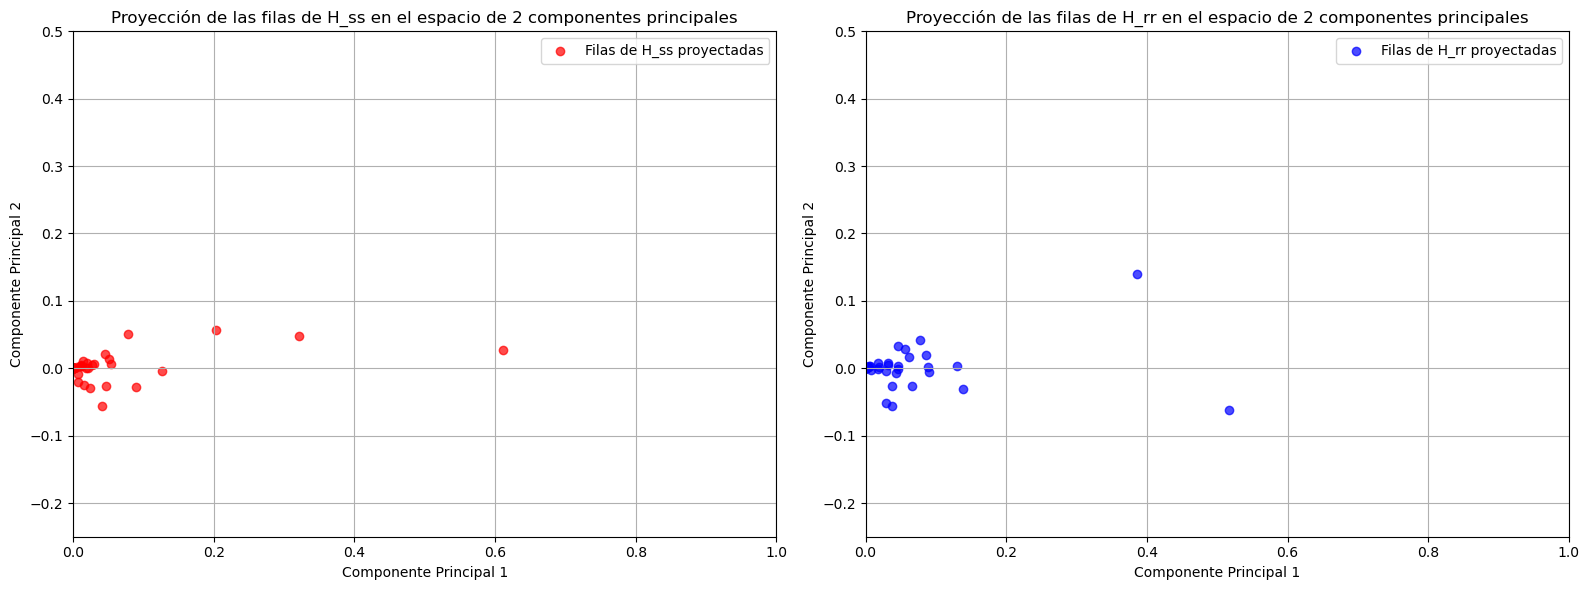

In [30]:
I_menos_Ass = I_40 - A_ss
L_ss,U_ss, P_ss = fn.calcularLU(I_menos_Ass)
I_menos_Ass_inv = fn.inversaLU(L_ss, U_ss, P_ss)
H_ss = A_ss @ I_menos_Ass_inv

I_menos_Arr = I_40 - A_rr
L_rr,U_rr, P_rr = fn.calcularLU(I_menos_Arr)
I_menos_Arr_inv = fn.inversaLU(L_rr, U_rr, P_rr)
H_rr = A_rr @ I_menos_Arr_inv

HssproyeccionX = H_ss @ a
HssproyeccionY = H_ss @ b

HrrproyeccionX = H_rr @ a
HrrproyeccionY = H_rr @ b

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Crea una figura con 1 fila y 2 columnas

# Primer gráfico en ax1
ax1.scatter(HssproyeccionX, HssproyeccionY, color='red', alpha=0.7, label="Filas de H_ss proyectadas")
ax1.set_xlabel("Componente Principal 1")
ax1.set_ylabel("Componente Principal 2")
ax1.set_title("Proyección de las filas de H_ss en el espacio de 2 componentes principales")
ax1.legend()
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.25, 0.5)
ax1.grid(True)

# Segundo gráfico en ax2
ax2.scatter(HrrproyeccionX, HrrproyeccionY, color='blue', alpha=0.7, label="Filas de H_rr proyectadas")
ax2.set_xlabel("Componente Principal 1")
ax2.set_ylabel("Componente Principal 2")
ax2.set_title("Proyección de las filas de H_rr en el espacio de 2 componentes principales")
ax2.legend()
ax2.set_xlim(0, 1)
ax2.set_ylim(-0.25, 0.5)
ax2.grid(True)

plt.tight_layout()  # Ajusta el espacio entre los gráficos
plt.show()



---



### Consigna 11

Para esta consigna vamos a calcular primeramente las distancias al origen, y quedarnos con la más chica y la más grande. Luego, para cada sector identificado (el más cercano y el más lejano), graficamos su fila en las matrices $A^{rr}$ y $H^{rr}$ para Paraguay, y en $A^{ss}$ y $H^{ss}$ para El Salvador. Esto permitirá ver diferencias en los perfiles de producción.

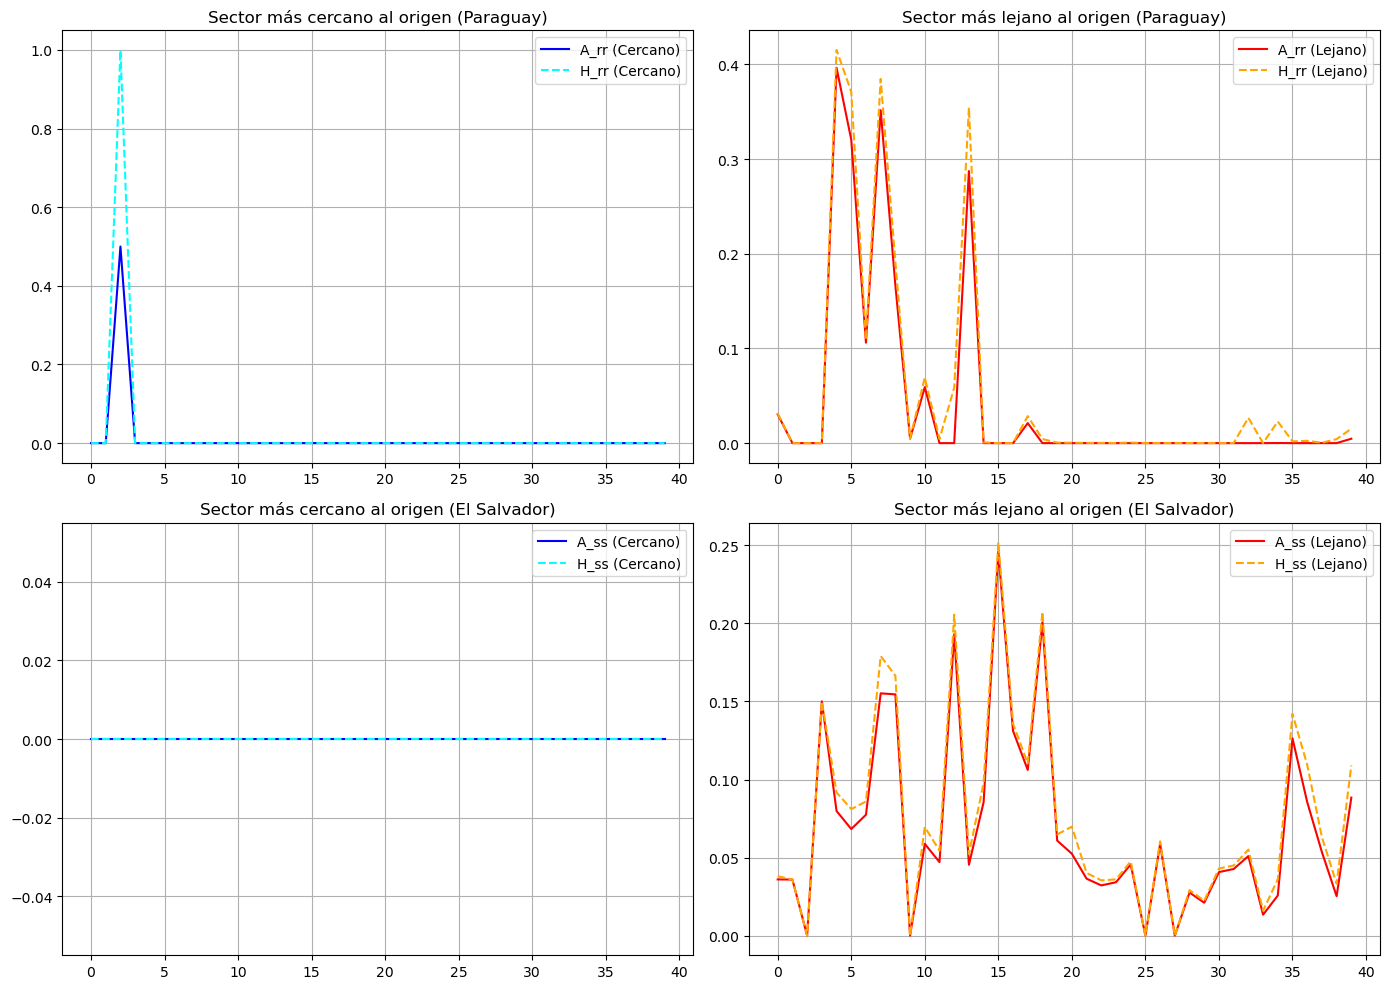

In [32]:
#Calculamos las distancias
distancias_Hss = np.sqrt(HssproyeccionX**2 + HssproyeccionY**2)
distancias_Hrr = np.sqrt(HrrproyeccionX**2 + HrrproyeccionY**2)
# Definimos los más cercanos y los más lejanos
sector_mas_cercano_Hss = np.argmin(distancias_Hss)
sector_mas_lejano_Hss = np.argmax(distancias_Hss)

sector_mas_cercano_Hrr = np.argmin(distancias_Hrr)
sector_mas_lejano_Hrr = np.argmax(distancias_Hrr)

perfil_Arr_cercano = A_rr[sector_mas_cercano_Hrr, :]
perfil_Hrr_cercano = H_rr[sector_mas_cercano_Hrr, :]
perfil_Arr_lejano = A_rr[sector_mas_lejano_Hrr, :]
perfil_Hrr_lejano = H_rr[sector_mas_lejano_Hrr, :]

perfil_Ass_cercano = A_ss[sector_mas_cercano_Hss, :]
perfil_Hss_cercano = H_ss[sector_mas_cercano_Hss, :]
perfil_Ass_lejano = A_ss[sector_mas_lejano_Hss, :]
perfil_Hss_lejano = H_ss[sector_mas_lejano_Hss, :]

# Graficamos los perfiles de producción para el sector más cercano y más lejano al origen
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Graficamos los perfiles de A_rr y H_rr para el sector más cercano
axs[0, 0].plot(perfil_Arr_cercano, label="A_rr (Cercano)", color="blue")
axs[0, 0].plot(perfil_Hrr_cercano, label="H_rr (Cercano)", color="cyan", linestyle="--")
axs[0, 0].set_title("Sector más cercano al origen (Paraguay)")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Graficamos los perfiles de A_rr y H_rr para el sector más lejano
axs[0, 1].plot(perfil_Arr_lejano, label="A_rr (Lejano)", color="red")
axs[0, 1].plot(perfil_Hrr_lejano, label="H_rr (Lejano)", color="orange", linestyle="--")
axs[0, 1].set_title("Sector más lejano al origen (Paraguay)")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Graficamos los perfiles de A_ss y H_ss para el sector más cercano
axs[1, 0].plot(perfil_Ass_cercano, label="A_ss (Cercano)", color="blue")
axs[1, 0].plot(perfil_Hss_cercano, label="H_ss (Cercano)", color="cyan", linestyle="--")
axs[1, 0].set_title("Sector más cercano al origen (El Salvador)")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Graficamos los perfiles de A_ss y H_ss para el sector más lejano
axs[1, 1].plot(perfil_Ass_lejano, label="A_ss (Lejano)", color="red")
axs[1, 1].plot(perfil_Hss_lejano, label="H_ss (Lejano)", color="orange", linestyle="--")
axs[1, 1].set_title("Sector más lejano al origen (El Salvador)")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

Los sectores más lejanos del origen pueden tener valores más altos en sus proyecciones, lo que indica una mayor dependencia o contribución en la estructura de insumo-producto, mientras que los sectores más cercanos al origen podrían representar actividades con menor interacción o peso en la economía.
Las diferencias pueden deberse a cómo cada sector participa en la economía intrarregional y cómo se ve afectado por la matriz de coeficientes técnicos en $H$, la cuál refuerza relaciones de alta relevancia.